# 1. 初探数据
- 对数据的认识很重要
- 数据中的特殊点和离群点的分析和处理很重要
- 特征工程太重要了，在很多Kaggle的场景下，甚至比Model本身还要重要
- 要做模型融合
以上是Kaggle大神分享的一些经验，从上面的经验看得出来，对数据的预处理非常重要。

In [36]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

data_train = pd.read_csv('./input/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


这就是典型的dataframe格式，如果你没接触过这种格式，完全没有关系，你就把它想象成Excel里面的列好了。 
我们看到，总共有12列，其中Survived字段表示的是该乘客是否获救，其余都是乘客的个人信息，包括：
- PassengerId -> 乘客ID
- Pclass -> 乘客等级(1/2/3等舱位)
- Name -> 乘客姓名
- Sex -> 性别
- Age -> 年龄
- SibSp -> 堂兄弟/妹个数
- Parch -> 父母小孩个数
- Ticket -> 船票信息
- Fare -> 票价
- Cabin -> 客舱
- Embarked -> 登船港口

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


通过data_train.info()函数，我们可以大概的看一下整个数据的情况，我们可以明显的看出来有一些数据是丢失的，比如Age、Cabin这些数据。我们可以查看数据的分布情况：

In [38]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过以上的信息，我们得到什么？mean字段告诉我们，大概有0.38的人最后获救了，2/3等舱的人数比1等舱要多，平均乘客年龄大概是29.7岁等。

# 2. 数据初步分析
每个乘客都这么多属性，那我们怎么知道哪些属性更有用，而又应该怎么用它们呢？仅仅就上面对数据的了解，依旧无法给我们提供想法和思路，要更加深入一点来看看我们的数据，看看每个/多个属性和最后的survived之间有着什么样的关系。

# 2.1 乘客各个属性分布
我们通过统计的方式，画些图来看看属性和结果之间的关系：

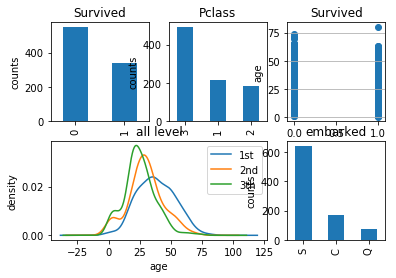

In [39]:
# -*-coding:utf-8 -*-
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha = 0.5)

# 画出存活与死亡人数统计
plt.subplot2grid((2,3),(0,0))             # 在一张大图里分列几个小图
data_train.Survived.value_counts().plot(kind='bar')# 柱状图 
plt.title(u"Survived") # 标题
plt.ylabel("counts")  

# 乘客等级分布
plt.subplot2grid((2,3), (0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title('Pclass')
plt.ylabel('counts')

# 按年龄看获救分布
plt.subplot2grid((2,3), (0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.title('Survived')
plt.ylabel('age')
plt.grid(b=True, which='major', axis='y')

# 各等级的乘客年龄分布
plt.subplot2grid((2,3), (1,0), colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.title('all level')
plt.ylabel('density')
plt.xlabel('age')
plt.legend(('1st','2nd','3th'), loc='best')

# 各登船口岸上船人数
plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title('embarked')
plt.ylabel('counts')

plt.show()

看到这些统计图，我们应该可以得出一些结论：
- 被救的人300多点 不到半数
- 三等舱乘客非常多
- 遇难和获救的人年龄跨度都很广
- 3个不同的舱年龄总体趋势是一致的，2/3等舱乘客20岁多点的人最多 1等舱40岁左右的最多
- 登船港口人数按照S、C、Q递减，而且S远多于另外两个港口。

这时候，我们就可以有一些想法，或者猜测：
- 不同舱位，乘客等级可能和财富 地位有关系，最后获救概率可能会不一样
- 年龄对获救概率也不一定是有影响的
- 和登船港口是不是有关系？也许登船港口不同，人的出身地位也不同？

我们进一步做数据统计分析，看看这些属性值的统计分布。

# 2.2 属性与获救结果的关联统计

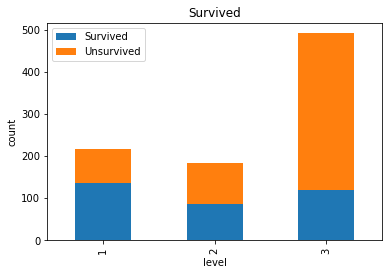

In [40]:
# 看看各乘客等级的获救情况

fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({'Survived':Survived_1, 'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('level')
plt.ylabel('count')
plt.show()

可以看出来，钱和地位对仓位有影响，进而对获救的可能性也有影响。这个一定是影响最后获救结果的一个特征。

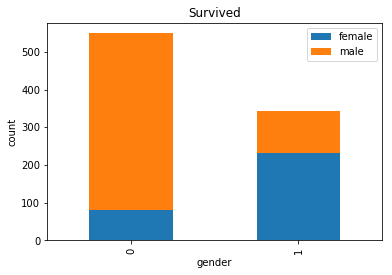

In [41]:
# 看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({'male':Survived_m, 'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

lady first践行得不错，性别无疑也要作为重要特征加入最后的模型之中。

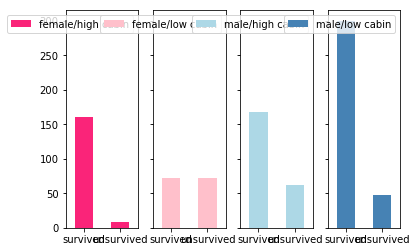

In [42]:
# 再来看下各种舱位级别情况下 各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.5)

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='female high class', color='#FA2479')
ax1.set_xticklabels(['survived', 'unsurvived'], rotation=0)
plt.legend(['female/high cabin'], loc='best')

ax2 = fig.add_subplot(142, sharey=ax1)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female low class', color='pink')
ax2.set_xticklabels(['survived', 'unsurvived'], rotation=0)
ax2.legend(['female/low cabin'], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels(['survived', 'unsurvived'], rotation=0)
plt.legend(['male/high cabin'], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels(['survived', 'unsurvived'], rotation=0)
plt.legend(['male/low cabin'], loc='best')

plt.show()

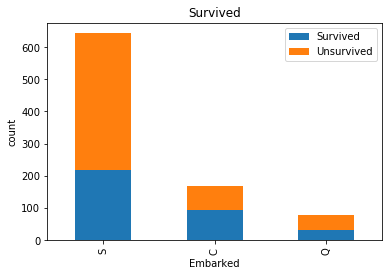

In [43]:
# 我们看一看 各登船港口的获救情况

fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()

df = pd.DataFrame({'Survived':Survived_1, 'Unsurvived':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('Embarked')
plt.ylabel('count')

plt.show()

In [44]:
# 我们现在看看 堂兄弟/妹 孩子/父母有几人，对是否获救的影响
g = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])

df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [45]:
g = data_train.groupby(['Parch', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

在这两个特征上并不能看出明显的规律出来。或者说有规律，但是肉眼很难直接找出来。

In [46]:
# 查看一下cabin的分布
data_train.Cabin.value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
E101               3
F33                3
F2                 3
D                  3
B57 B59 B63 B66    2
B77                2
B51 B53 B55        2
C124               2
B35                2
F G73              2
D36                2
C123               2
C93                2
B28                2
C68                2
B49                2
B18                2
C125               2
E25                2
E33                2
C52                2
F4                 2
C2                 2
C92                2
B58 B60            2
E24                2
                  ..
E17                1
D46                1
E34                1
A19                1
E36                1
C7                 1
B80                1
B39                1
B42                1
C95                1
D11                1
D19                1
C128               1
E40                1
C106               1
C49                1
B50          

对于这个属性，我们发现，缺失值比较多，而且数据不太集中。如果按照类目特征直接处理的话，太散了，估计每个因子化之后的特征都拿不到什么权重。加上有那么多缺失值，可以先把Cabin缺失与否作为条件，先在有无Cabin信息这个粗粒度上看看Survived的情况。

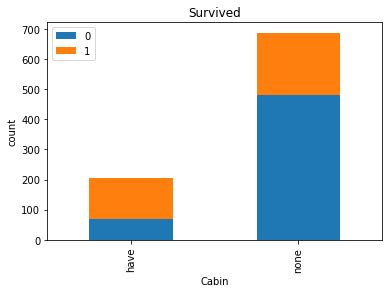

In [47]:
fig = plt.figure()
fig.set(alpha=0)

Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({'have': Survived_cabin, 'none':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title('Survived')
plt.xlabel('Cabin')
plt.ylabel('count')
plt.show()

看起来有Cabin的存活率可能会高一点，但是，是否真的如此，还不好说呢，因为好像不是很合理。

# 3. 简单的数据预处理
在进行的数据分析之后，我们对数据就有了大概的认识，下一步我们该怎么做呢？我们就可以处理一下这些数据，为机器学习建模做点准备了。
我们先从最突出的数据属性开始，对于Cabin和Age，这两个属性来说，数据丢失比较严重，对下一步工作影响比较大，可以先对其进行处理。
- Cabin 我们可以将Cabin有无处理有Yes No两种类型
- Age 通常遇到缺失值的情况，我们会有几种常见的处理方式
    - 如果缺失值的样本占总数比例比较高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
    - 如果缺失值的样本适中，而该属性非连续值特征属性，那就把NaN作为一个新类别，加到类别特征中
    - 如果缺失值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定给一个step，然后把它离散化，之后把NaN作为一个type加入到属性类目中。
    
在本例子中，处理Age时候，我们可以试一试拟合补全。我们这里用scikit-learn中的RandomForest来拟合一下缺失的年龄数据。

In [48]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_ages(df):
    
    age_df = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()
    
    y = known_age[:, 0]
    
    X = known_age[:, 1:]
    
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    predictedAges = rfr.predict(unknown_age[:, 1::])
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,23.828953,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C


这时候，算是把缺失值给补上了，紧接着我们需要做什么呢？
我们可以先使用逻辑回归来建立模型，在逻辑回归建模时，需要输入的特征都是数值型特征，我们通常会先对类目型的特征因子化。
我们先来看一下什么叫因子化：
```
以Cabin为例，原本一个属性维度，因为其取值可以是[‘yes’,’no’]，而将其平展开为’Cabin_yes’,’Cabin_no’两个属性

原本Cabin取值为yes的，在此处的”Cabin_yes”下取值为1，在”Cabin_no”下取值为0
原本Cabin取值为no的，在此处的”Cabin_yes”下取值为0，在”Cabin_no”下取值为1
我们使用pandas的”get_dummies”来完成这个工作，并拼接在原来的”data_train”之上，如下所示。
```

In [50]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)

df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0


我们似乎已经把这些类目属性全部都转化为了0,1的数值属性了，这样看起来，我们需要的属性值都有了，我们仔细看看Age和Fare两个属性属性，乘客的数值幅度变化，太大了，如果大家了解逻辑回归与梯度下降的话，会知道，各属性之间scale差距太大，将会对收敛速度造成很大的影响。所以，我们先用scikit-learn里面的preprocessing模块对这两个属性做一个scaling，所谓scaling，其实就是将一些变化幅度较大的特征化到[-1,1]之内。

In [51]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df

/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.000000,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561363,-0.502445
1,2,1,38.000000,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613182,0.786845
2,3,1,26.000000,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267727,-0.488854
3,4,1,35.000000,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.392955,0.420730
4,5,0,35.000000,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.392955,-0.486337
5,6,0,23.828953,0,0,8.4583,1,0,0,1,0,0,1,0,0,1,-0.427102,-0.478116
6,7,0,54.000000,0,0,51.8625,0,1,0,0,1,0,1,1,0,0,1.787727,0.395814
7,8,0,2.000000,3,1,21.0750,1,0,0,0,1,0,1,0,0,1,-2.029545,-0.224083
8,9,1,27.000000,0,2,11.1333,1,0,0,0,1,1,0,0,0,1,-0.194318,-0.424256
9,10,1,14.000000,1,0,30.0708,1,0,1,0,0,1,0,0,1,0,-1.148636,-0.042956


# 4. 逻辑回归建模
我们把需要的字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [52]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:, 0]

X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

我们还需要把test.csv中的数据做同样的预处理才能够放到模型中去跑。

In [53]:
data_test = pd.read_csv("./input/test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
# 接着我们对test_data做和train_data中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'], fare_scale_param)
df_test

/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307535,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.256230,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.394665,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261683,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641161,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,1,0,0,1,-1.248326,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,1,0,0,0,1,-0.033996,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,1,0,-0.337578,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,1,0,0,0,1,-0.944743,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,1,0,0,1,-0.717056,-0.204154


In [55]:
# 这个时候，我们就可以做一下预测了
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)

result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv('./output/logistic_regression_predictions.csv', index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


可以将该结果提交到Kaggle上取测试一下，大概的排名如下:
可以看出来，简单的几个数据分析+数据预处理+简单的逻辑回归模型，就可以得到很不错的结果了
![](./images/logistic_regression.png)

# 5. 逻辑回归系统优化
在做完baseline之后，我们可以继续对我们的模型进行优化以得到更好的结果。
我们应该分析模型现在的状态了，是过/欠拟合？以确定我们需要更多的特征还是更多数据，或者其他操作。我们有一条很著名的learning curves可以参考。
不过在现在的场景下，先不着急做这个事情，我们这个baseline系统还要些粗糙，先再挖掘挖掘:
- 首选，NameTicket两个属性被我完整舍弃了。
- 然后，年龄的拟合本身也未必是一件非常靠谱的事情，我们依据其余属性，其实并不能很好的拟合预测出未知的年龄。再一个，以我们的日常经验，小朋友和老人可能得到的照顾会多一些，这样看的话，年龄作为一个连续值，给一个固定的系数，应该和年龄是一个正相关或负相关，似乎体现不出两头受照顾的实际情况，所以，说不定我们把年龄离散化，按区段分作类别属性会更加合适一些。
当然，这些也只是猜想，我们可以将model系数和feature关联起来看看。

In [56]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,coef,columns
0,[-0.34422890408],SibSp
1,[-0.104931375657],Parch
2,[0.0],Cabin_No
3,[0.902141419893],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417261774793],Embarked_S
7,[1.95657654494],Sex_female
8,[-0.677419579436],Sex_male
9,[0.341143400066],Pclass_1


这些系数为正的特征，和最后结果是一个正相关，反之为负相关。
我们先看看那些权重绝对值非常大的feature，在我们模型上：
- Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
- Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
- 有Cabin值会很大程度拉升最后获救概率。
- Age是一个负相关，意味着在我们的模型中，年龄越小，越有获救的优先权。
- 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用。
- 船票Fare有小幅度的正相关。

看完了各个特征的相关性，可能我们会有一些新的想法，但是怎么样才知道，哪些优化的方法是promising的呢？
因为在test.csv里面并没有Survived这个字段，我们无法在这份数据上评定我们算法在该场景下的效果，而每做一次调整就make a submission，然后根据结果来判定这次调整的好坏，其实是行不通的。

## 5.1 交叉验证
我们通常情况下，这么做cross validation, 把train.csv分成两部分，一部分用于训练我们需要的模型，另外一部分数据看我们预测算法的效果。
我们用scikit-learn的cross_validation来帮我们完成小数据集上的这份工作。
先简单的看看cross validation情况下的打分:

In [57]:
from sklearn import cross_validation
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.as_matrix()[:, 1:]
y = all_data.as_matrix()[:, 0]
print(cross_validation.cross_val_score(clf, X, y, cv=5))

[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


/home/conghuai/Dropbox/lib/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


结果比Kaggle上的略高，毕竟用的不是同一份数据集评估的。
既然我们要做交叉验证，那我们干脆先把交叉验证里面的bad case拿出来看看，看看人眼审核，是否能发现什么蛛丝马迹，是我们忽略了哪些信息，使得这些乘客被判定错了。
下面我们做数据分割，并且在原始数据集上看一下bad case:

In [58]:
split_train, split_cv = cross_validation.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:,1:])

origin_data_train = pd.read_csv("./input/train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.as_matrix()[:,0]]['PassengerId'].values)]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.00,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.00,4,2,3101281,7.9250,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S
113,114,0,3,"Jussila, Miss. Katriina",female,20.00,1,0,4136,9.8250,NaN,S
140,141,0,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C
204,205,1,3,"Cohen, Mr. Gurshon ""Gus""",male,18.00,0,0,A/5 3540,8.0500,NaN,S
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C


大家可以自己跑一遍试试，拿到bad cases之后，仔细看看。也会有一些猜测和想法。其中会有一部分可能会印证在系数分析部分的猜测，那这些优化的想法优先级可以放高一些。

现在有了”train_df” 和 “vc_df” 两个数据部分，前者用于训练model，后者用于评定和选择模型。可以开始可劲折腾了。

我们随便列一些可能可以做的优化操作：

- Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
- Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
- Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
- Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
- 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
- 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
- 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
- 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
- Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

试验的过程比较漫长，也需要有耐心，而且我们经常会面临很尴尬的状况，就是我们灵光一闪，想到一个feature，然后坚信它一定有效，结果试验下来，效果还不如试验之前的结果。恩，需要坚持和耐心，以及不断的挖掘。

# 5.2  learning curves
有一个很可能发生的问题是，我们不断地做feature engineering，产生的特征越来越多，用这些特征去训练模型，会对我们的训练集拟合得越来越好，同时也可能在逐步丧失泛化能力，从而在待预测的数据上，表现不佳，也就是发生过拟合问题。
从另一个角度上说，如果模型在待预测的数据上表现不佳，除掉上面说的过拟合问题，也有可能是欠拟合问题，也就是说在训练集上，其实拟合的也不是那么好。
- 过拟合就像是你班那个学数学比较刻板的同学，老师讲过的题目，一字不漏全记下来了，于是老师再出一样的题目，分分钟精确出结果。but数学考试，因为总是碰到新题目，所以成绩不咋地。
- 欠拟合就像是，咳咳，和博主level差不多的差生。连老师讲的练习题也记不住，于是连老师出一样题目复习的周测都做不好，考试更是可想而知了。
而在机器学习的问题上，对于过拟合和欠拟合两种情形。我们优化的方式是不同的。
对过拟合而言，通常以下策略对结果优化是有用的：
- 做一下feature selection，挑出较好的feature的subset来做training
- 提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确

而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度。

著名的learning curve可以帮我们判定我们的模型现在所处的状态。我们以样本数为横坐标，训练和交叉验证集上的错误率作为纵坐标，两种状态分别如下两张图所示：过拟合，欠拟合：

![](./images/high_variance.jpg)
![](./images/high_bias.jpg)

我们也可以把错误率替换成准确率，得到另一种形式的learning curve。我们用scikit-learn里面的learning_curve来帮我们分辨我们模型的状态。这里我们画一下我们最先得到的baseline model的learning curve。

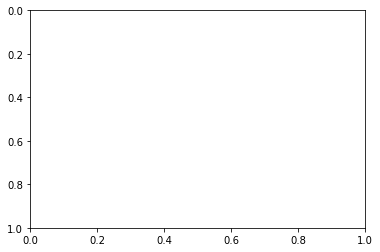

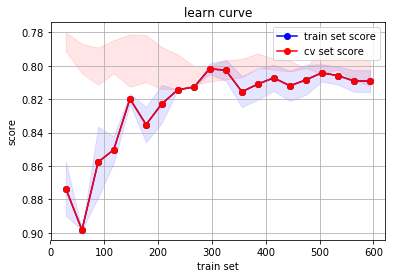

(0.80656968448540245, 0.018258876711338634)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('train set')
        plt.ylabel('score')
        plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean+train_scores_std, alpha=0.1, color='b')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='r')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='train set score')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='cv set score')
        
        plt.legend(loc='best')
        
        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()
        
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] -  test_scores_std[-1]))/2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(clf, 'learn curve', X, y)

# 6. 模型融合
先解释解释，一会儿再回到我们的问题上哈。 
啥叫模型融合呢，我们还是举几个例子直观理解一下好了。

大家都看过知识问答的综艺节目中，求助现场观众时候，让观众投票，最高的答案作为自己的答案的形式吧，每个人都有一个判定结果，最后我们相信答案在大多数人手里。

再通俗一点举个例子。你和你班某数学大神关系好，每次作业都『模仿』他的，于是绝大多数情况下，他做对了，你也对了。突然某一天大神脑子犯糊涂，手一抖，写错了一个数，于是…恩，你也只能跟着错了。 
我们再来看看另外一个场景，你和你班5个数学大神关系都很好，每次都把他们作业拿过来，对比一下，再『自己做』，那你想想，如果哪天某大神犯糊涂了，写错了，but另外四个写对了啊，那你肯定相信另外4人的是正确答案吧？

最简单的模型融合大概就是这么个意思，比如分类问题，当我们手头上有一堆在同一份数据集上训练得到的分类器(比如logistic regression，SVM，KNN，random forest，神经网络)，那我们让他们都分别去做判定，然后对结果做投票统计，取票数最多的结果为最后结果。

模型融合可以比较好地缓解，训练过程中产生的过拟合问题，从而对于结果的准确度提升有一定的帮助。

话说回来，回到我们现在的问题。你看，我们现在只讲了logistic regression，如果我们还想用这个融合思想去提高我们的结果，我们该怎么做呢？

既然这个时候模型没得选，那咱们就在数据上动动手脚咯。大家想想，如果模型出现过拟合现在，一定是在我们的训练上出现拟合过度造成的对吧。

那我们干脆就不要用全部的训练集，每次取训练集的一个subset，做训练，这样，我们虽然用的是同一个机器学习算法，但是得到的模型却是不一样的；同时，因为我们没有任何一份子数据集是全的，因此即使出现过拟合，也是在子训练集上出现过拟合，而不是全体数据上，这样做一个融合，可能对最后的结果有一定的帮助。对，这就是常用的Bagging。
我们用scikit-learn里面的Bagging来完成上面的思路，过程非常简单。代码如下：

In [63]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("./output/logistic_regression_bagging_predictions.csv", index=False)

我们将结果进行提交，得到了如下的成绩:
![](./images/logistic_regression_bagging_result.png)

# 7.  Summary
对于任何机器学习问题，不要一上来就追求尽善尽美，先用自己会的算法做一个baseline model出来，再进行后续的分析步骤，一步步提高。
在这个过程中：
- 对数据的认识很重要
- 数据中的特殊点/离群点的分析和处理很重要
- 特征工程很重要
- 模型融合很重要
我们可以参考如下过程：
![](./images/process.jpg)